简单的说： 线性回归对于输入x与输出y有一个映射f，y=f(x),而f的形式为aX+b。其中a和b是两个可调的参数，我们训练的时候就是训练a，b这两个参数。

In [25]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

In [26]:

import torch
from torch.nn import Linear, Module, MSELoss
from torch.optim import SGD
import numpy as np
import pandas as pd
torch.__version__



'1.12.0+cpu'

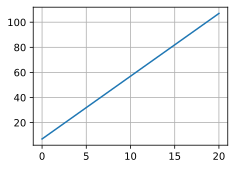

In [27]:

x = np.linspace(0,20,500)
y = 5*x + 7
d2l.plot(x,y)


In [28]:
x = np.random.rand(256)
noise = np.random.randn(256) / 4
y = x * 5 + 7 + noise
df = pd.DataFrame()
df['x'] = x
df['y'] = y

In [29]:
model=Linear(1, 1)
criterion = MSELoss()
optim = SGD(model.parameters(), lr = 0.01)
epochs = 3000

x_train = x.reshape(-1, 1).astype('float32')
y_train = y.reshape(-1, 1).astype('float32')

In [39]:
for i in range(epochs):
   inputs = torch.from_numpy(x_train)
   labels = torch.from_numpy(y_train)
   outputs = model(inputs)
   optim.zero_grad()
   loss = criterion(outputs,labels)
   loss.backward()
   optim.step()
   

In [38]:
[w, b] = model.parameters()
print (w.item(),b.item())

4.985838890075684 7.002436637878418


predicted = model.forward(torch.from_numpy(x_train)).data.numpy()
d2l.plt.plot(x_train, y_train, 'go', label = 'data', alpha = 0.3)
d2l.plt.plot(x_train, predicted, label = 'predicted', alpha = 1)
d2l.plt.legend()
d2l.plt.show()

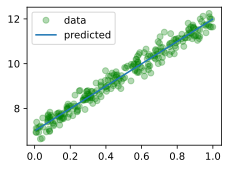

In [40]:
predicted = model.forward(torch.from_numpy(x_train)).data.numpy()
d2l.plt.plot(x_train, y_train, 'go', label = 'data', alpha = 0.3)
d2l.plt.plot(x_train, predicted, label = 'predicted', alpha = 1)
d2l.plt.legend()
d2l.plt.show()